**Uploading the Dataset**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Loading and Initial Exploration of the Dataset**

In [2]:
# Load the raw file
file_path = 'primary_data.csv'

# Read the file line by line
with open(file_path, 'r') as file:
    lines = file.readlines()

# Prepare cleaned data and log problematic rows
cleaned_data = []
problematic_lines = []

# Process the file to match the expected number of columns
for i, line in enumerate(lines):
    # Split each line based on the semicolon delimiter
    fields = line.strip().split(';')

    # Ensure the row matches the expected number of columns (23 here, inferred from the header)
    if len(fields) == 23:
        cleaned_data.append(fields)
    else:
        problematic_lines.append((i + 1, line))  # Log line number and content

# Convert the cleaned data into a DataFrame
cleaned_df = pd.DataFrame(cleaned_data[1:], columns=cleaned_data[0])  # First row is the header

# Save the cleaned DataFrame to a CSV file for review
cleaned_df.to_csv('cleaned_primary_data.csv', index=False)

# Display a summary of problematic rows
print(f"Total problematic rows: {len(problematic_lines)}")
if problematic_lines:
    print("Examples of problematic rows:")
    for line in problematic_lines[:5]:  # Display up to 5 examples
        print(line)

# Display the first few rows of the cleaned DataFrame
cleaned_df.head()


Total problematic rows: 0


,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],,...,[s],[y],[w],[u],[w],[t],"[g, p]",,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],,...,,[y],[w],[u],[w],[t],[p],,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",,"[g, n]",[f],[e],,...,,,[w],[u],[w],[t],"[e, g]",,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",,[n],[t],,,...,[b],,[w],[u],[w],[t],[g],,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],,[c],...,,,[w],[u],[w],[t],"[g, p]",,[d],"[u, a]"


In [3]:

# Specify the path to the cleaned CSV file
file_path = 'cleaned_primary_data.csv'

# Load the cleaned CSV file
df = pd.read_csv(file_path, delimiter=',')

# Display the first few rows to confirm successful loading
df.head()


,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


**Display Basic Information:**


In [4]:
# Display the first few rows
df.head()

# Show descriptive statistics
print(df.describe());

# Info about the dataset
print(df.info());


                   family        name class cap-diameter cap-shape  \
count                 173         173   173          173       173   
unique                 23         173     2           51        27   
top     Tricholoma Family  Fly Agaric     p       [2, 5]       [x]   
freq                   43           1    96           16        48   

       Cap-surface cap-color does-bruise-or-bleed gill-attachment  \
count          133       173                  173             145   
unique          40        67                    2               8   
top            [y]       [n]                  [f]             [a]   
freq            14        38                  143              32   

       gill-spacing  ... stem-root stem-surface stem-color veil-type  \
count           102  ...        27           65        173         9   
unique            3  ...         5           14         41         1   
top             [c]  ...       [s]          [s]        [w]       [u]   
freq           

**Data Preprocessing**

In [5]:
# Display the number of missing values in each column
print(df.isnull().sum())


family                    0
name                      0
class                     0
cap-diameter              0
cap-shape                 0
Cap-surface              40
cap-color                 0
does-bruise-or-bleed      0
gill-attachment          28
gill-spacing             71
gill-color                0
stem-height               0
stem-width                0
stem-root               146
stem-surface            108
stem-color                0
veil-type               164
veil-color              152
has-ring                  0
ring-type                 7
Spore-print-color       155
habitat                   0
season                    0
dtype: int64


**Dealing with Missing Values:**


In [6]:
# For simplicity, fill missing values with the mode (most frequent value) for each column
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)


**Encoding Categorical Variables**

In [7]:
# Using Label Encoder to convert categorical columns to numeric
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the label encoder for this column


**Feature Scaling**

In [8]:
# Using StandardScaler to scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('class', axis=1)), columns=df.columns[1:])
df_scaled['class'] = df['class']  # Add the target class back after scaling


**Exploratory Data Analysis (EDA)**

In [9]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


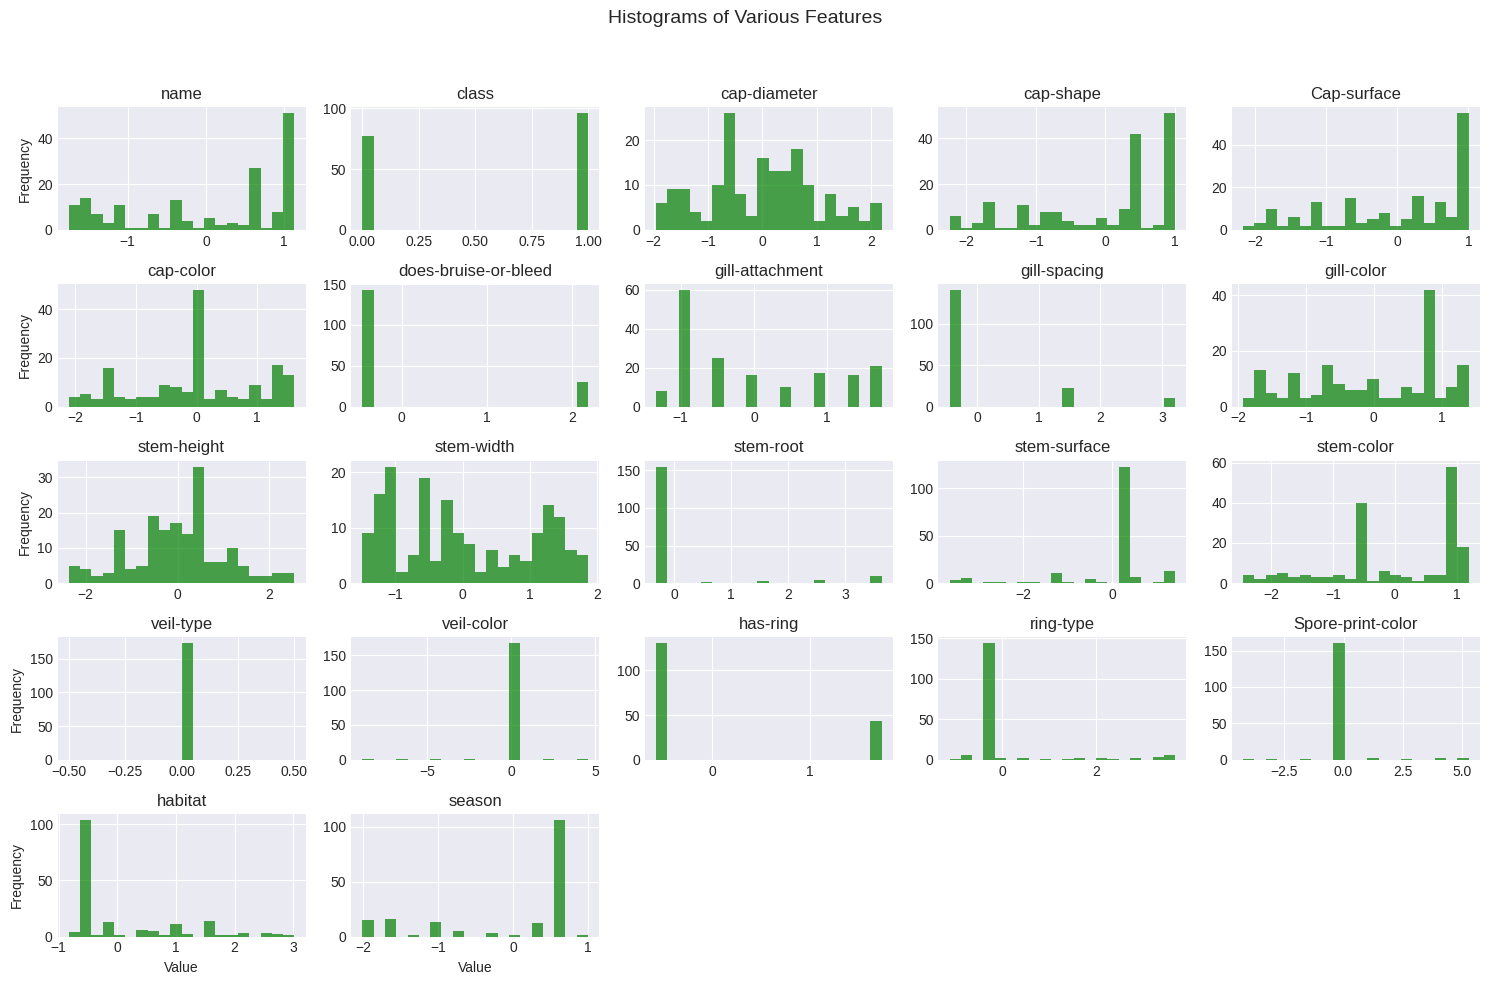

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data loading, replace this with your actual DataFrame
# df_scaled = pd.DataFrame(data)

# Apply the Seaborn dark grid style
plt.style.use('seaborn-v0_8-darkgrid')  # Correct style name from your list

# Plot histograms
axes = df_scaled.hist(bins=20, alpha=0.7, figsize=(15, 10), grid=True, color='green')

# Get the number of rows and columns in the axes array
num_rows = len(axes)
num_cols = len(axes[0])

# Set individual titles and labels
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i][j]
        # Set x-labels for the last row
        if i == num_rows - 1:
            ax.set_xlabel('Value')
        # Set y-labels for the first column
        if j == 0:
            ax.set_ylabel('Frequency')

        # Set title to each subplot corresponding to the column name
        ax.set_title(ax.get_title(), fontsize=12, weight='normal')

# Set a main title
plt.suptitle('Histograms of Various Features', fontsize=14, weight='normal')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()


**Correlation Analysis** Heatmap of Correlations:



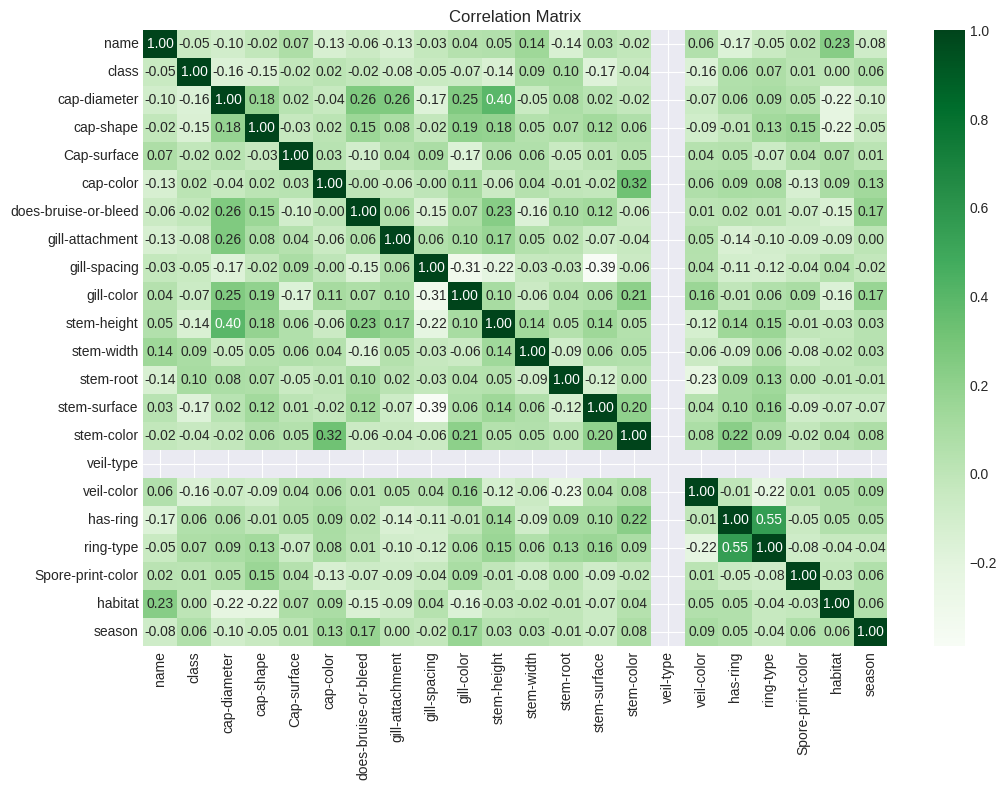

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [12]:
import pandas as pd

# Create a DataFrame for the models comparison table
data = {
    "Model Type": ["Logistic Regression", "K-Means Clustering", "Decision Trees", "Random Forests",
                   "Support Vector Machines (SVM)", "Neural Networks"],
    "Selected": ["Yes", "Yes", "No", "No", "No", "No"],
    "Advantages": [
        "- Direct probability estimation\n- High interpretability\n- Computational efficiency",
        "- Effective for natural group discovery\n- Scalable\n- Simple to implement",
        "- Intuitive understanding\n- Can model non-linear relationships",
        "- Good for handling overfitting\n- Can model non-linear relationships\n- Robust to outliers",
        "- Effective in high-dimensional spaces\n- Versatile with different kernel functions",
        "- Powerful for pattern recognition\n- Flexible in modeling complex relationships"
    ],
    "Disadvantages": [
        "- Limited to linear relationships in its basic form",
        "- Assumes spherical clusters\n- Sensitive to scale of data",
        "- Prone to overfitting\n- Complexity increases with depth",
        "- High computational cost\n- Less interpretable as the number of trees increases",
        "- Intensive computation required\n- Difficult to choose and tune the appropriate kernel",
        "- 'Black box' nature\n- Computationally demanding\n- Prone to overfitting"
    ],
    "Reason for (Non-)Selection": [
        "Ideal for binary classification with clear interpretation and efficiency in computation.",
        "Chosen for its ability to discover natural groupings efficiently and its simplicity in implementation.",
        "Not selected due to the high risk of overfitting and the increasing complexity with more data.",
        "Avoided due to its computational intensity and decreased interpretability with larger ensembles.",
        "Not chosen due to scalability issues and the complexity involved in kernel selection and tuning.",
        "Rejected because of the lack of interpretability, high resource demands, and overfitting concerns."
    ]
}

df_models = pd.DataFrame(data)

# Display the DataFrame
df_models


,Model Type,Selected,Advantages,Disadvantages,Reason for (Non-)Selection
0,Logistic Regression,Yes,- Direct probability estimation\n- High interp...,- Limited to linear relationships in its basic...,Ideal for binary classification with clear int...
1,K-Means Clustering,Yes,- Effective for natural group discovery\n- Sca...,- Assumes spherical clusters\n- Sensitive to s...,Chosen for its ability to discover natural gro...
2,Decision Trees,No,- Intuitive understanding\n- Can model non-lin...,- Prone to overfitting\n- Complexity increases...,Not selected due to the high risk of overfitti...
3,Random Forests,No,- Good for handling overfitting\n- Can model n...,- High computational cost\n- Less interpretabl...,Avoided due to its computational intensity and...
4,Support Vector Machines (SVM),No,- Effective in high-dimensional spaces\n- Vers...,- Intensive computation required\n- Difficult ...,Not chosen due to scalability issues and the c...
5,Neural Networks,No,- Powerful for pattern recognition\n- Flexible...,- 'Black box' nature\n- Computationally demand...,Rejected because of the lack of interpretabili...


**Split the Data:**

Divide the data into training and testing sets. This helps in evaluating the model's performance effectively.

In [13]:
# Splitting the dataset into training and testing sets
X = df_scaled.drop('class', axis=1)  # Features
y = df_scaled['class']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Initialize and Train the Model:**

Initialize the logistic regression model and train it on the training data.

In [14]:
# Initializing the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

**Evaluate the Model:**

Use accuracy and a classification report to evaluate the model on the test set.

In [15]:
# Predicting the test set results
y_pred = logistic_model.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55        17
           1       0.61      0.78      0.68        18

    accuracy                           0.63        35
   macro avg       0.64      0.62      0.62        35
weighted avg       0.64      0.63      0.62        35

Accuracy Score: 0.6285714285714286



--- Classification Metrics ---
Class 0 (Edible):
Precision: 0.67
Recall: 0.47
F1-Score: 0.55

Class 1 (Poisonous):
Precision: 0.61
Recall: 0.78
F1-Score: 0.68


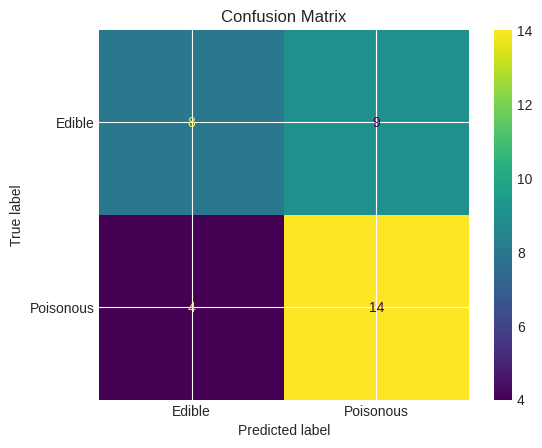

In [16]:
# Interpretation of Classification Results
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate Precision, Recall, and F1-Score for each class
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# Display Results
print("\n--- Classification Metrics ---")
print("Class 0 (Edible):")
print(f"Precision: {precision_class_0:.2f}")
print(f"Recall: {recall_class_0:.2f}")
print(f"F1-Score: {f1_class_0:.2f}\n")

print("Class 1 (Poisonous):")
print(f"Precision: {precision_class_1:.2f}")
print(f"Recall: {recall_class_1:.2f}")
print(f"F1-Score: {f1_class_1:.2f}")

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


**Choose Number of Clusters:**

Determine the optimal number of clusters using the Elbow method or silhouette score.

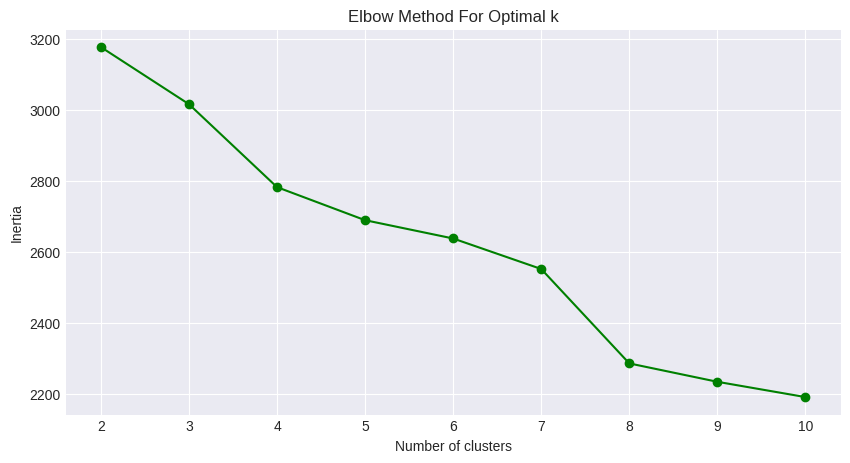

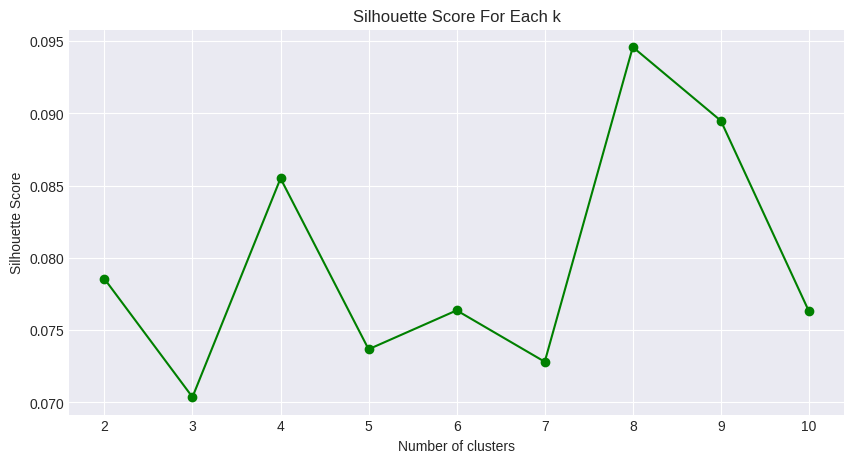

In [17]:
# Using the Elbow Method to find the optimal number of clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

inertia = []
silhouette_scores = []
X_scaled = df_scaled.drop('class', axis=1)  # Assuming 'class' is your target variable and the rest are features
for i in range(2, 11):  # testing different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', color='green')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o',color='green')
plt.title('Silhouette Score For Each k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


**Train the K-Means Model:**

Train a K-Means model using the optimal number of clusters determined.



In [18]:
# Training the K-Means model with the optimal number of clusters found
optimal_k = 4  # example value from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


**Evaluate the Clusters:**

Evaluate the quality of the clusters using silhouette score and visualize the clustering.

Silhouette Score for k= 4 : 0.08550064116774068


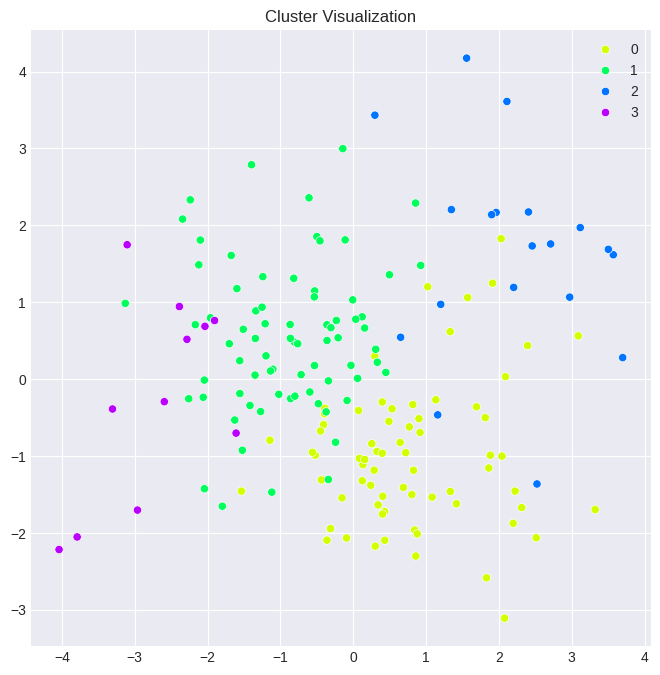

In [19]:
print("Silhouette Score for k=", optimal_k, ":", silhouette_score(X_scaled, cluster_labels))

# Visualizing the clusters (only possible if you reduce dimensionality, e.g., using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cluster_labels, palette=sns.color_palette("hsv", optimal_k))
plt.title('Cluster Visualization')
plt.show()


These steps complete the machine learning modeling for both classification and clustering. Next, we would proceed to discuss the model results, identify their implications, and suggest possible improvements based on the analysis.

**Model Interpretation and Validation**

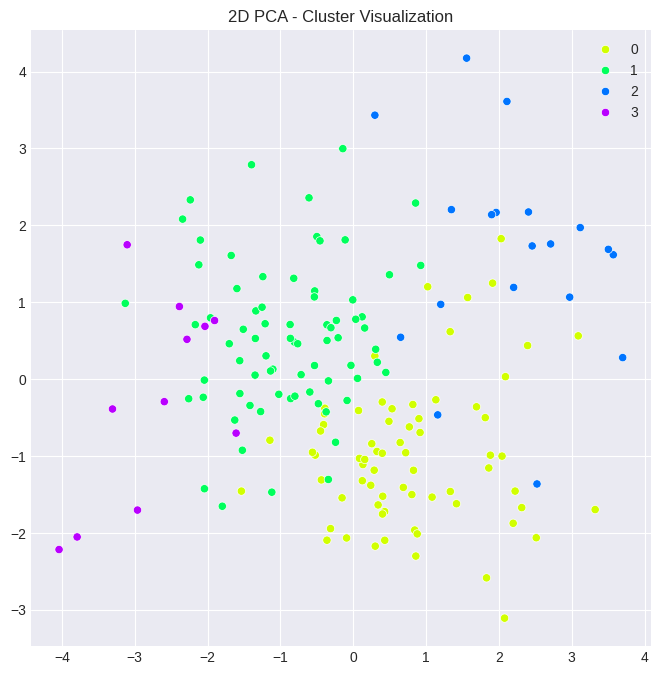

In [20]:
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 for visualization purposes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 8))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cluster_labels, palette=sns.color_palette("hsv", optimal_k), legend='full')
plt.title('2D PCA - Cluster Visualization')
plt.show()


**Evaluate Model Performance**

**Area Under Curve (AUC)**: Utilize the AUC metric to assess the model's ability to discriminate between the classes. A higher AUC value indicates a better performing model, especially valuable in imbalanced classification problems where positive and negative classes are not equally represented.

In [21]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are already defined and are your training datasets
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 62.86%


**Area Under Curve (AUC)**: Utilize the AUC metric to assess the model's ability to discriminate between the classes. A higher AUC value indicates a better performing model, especially valuable in imbalanced classification problems where positive and negative classes are not equally represented.

In [23]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc:.2f}")


AUC Score: 0.56


**Validate the Model with Cross-Validation**

**Cross-Validation**: Implement cross-validation techniques to verify the stability and reliability of the logistic regression model across different subsets of the dataset.

In [24]:
from sklearn.model_selection import cross_val_score
# Using 10-fold cross-validation
accuracy_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f"10-fold Cross-Validation Accuracies:\n{accuracy_scores}")
print(f"Average Accuracy: {accuracy_scores.mean() * 100:.2f}%")


10-fold Cross-Validation Accuracies:
[0.55555556 0.5        0.5        0.41176471 0.70588235 0.41176471
 0.52941176 0.64705882 0.35294118 0.64705882]
Average Accuracy: 52.61%


**Cross-Validated AUC**: For a more comprehensive validation, calculate the AUC within each fold of the cross-validation process.

In [25]:
auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f"10-fold Cross-Validation AUC Scores:\n{auc_scores}")
print(f"Average AUC Score: {auc_scores.mean():.2f}")


10-fold Cross-Validation AUC Scores:
[0.5375     0.5        0.4375     0.35714286 0.75714286 0.24285714
 0.625      0.56944444 0.44444444 0.81944444]
Average AUC Score: 0.53
